# <font color="darkblue"> Prática 01: Classificação Linear - Detector de spam simples </font>

**Objetivos:**


*   Classificar os emails utilizando o algoritmo PLA
*   Implementar o algoritmo *Pocket* PLA para classificar dados linearmente não divisíveis
*   Testar a classe LRClassifier nos mesmos dados

**Requisitos de execução:**


*   Upload dos arquivos *lrclassifier.py* e *linearregression.py* 
*   Criar o diretório *data* e upload do arquivo *spam.txt* neste diretório

**Atividade 1:**

Leia as características e rótulos dos emails contidos no arquivo *spam.txt* e plote a classificação dos emails em um gráfico de dispersão. Cor vermelha para spam (-1) e cor azul para email normal (+1).









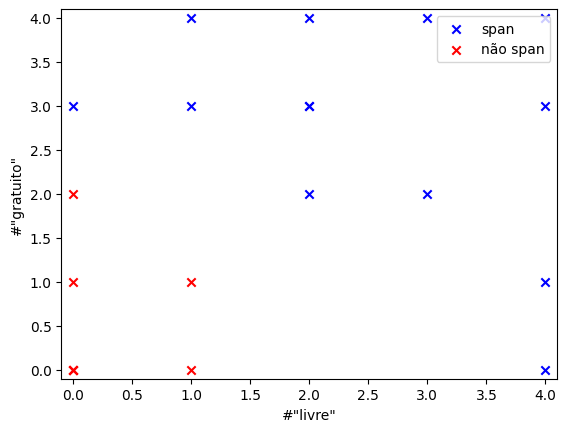

In [1]:
from matplotlib import pyplot as plt

def load_file_spam(fileName):
    arquivo = open(fileName, 'r')
    N = int(arquivo.readline().strip())
    arquivo.readline() #cabecalho
    
    X = []
    y = []
    i = 0
    for i in range(N):
        line = arquivo.readline()
        #for s in line.split():
        data = [int(s) for s in line.split()]
        X.append([data[0], data[1]])
        y.append(data[2])     
        
    arquivo.close()
    return X, y

#plota os pontos de frequencia das palavras nos emails
def draw(X, y):
    N = len(y)
    
    xB = [X[i][0] for i in range(N) if(y[i] > 0)]
    yB = [X[i][1] for i in range(N) if(y[i] > 0)]
    xV = [X[i][0] for i in range(N) if(y[i] < 0)]
    yV = [X[i][1] for i in range(N) if(y[i] < 0)]

    plt.scatter(xB, yB, color='blue', marker='x', label='span')
    plt.scatter(xV, yV, color='red', marker='x', label='não span')
   
    #configurações do gráfico
    plt.xlim((-0.1,4.1))
    plt.ylim((-0.1,4.1))
    plt.ylabel('#\"gratuito\"')
    plt.xlabel('#\"livre\"')
    plt.legend(loc='upper right')
    
X, y = load_file_spam("data/spam.txt")
draw(X,y)

**Atividade 2:**

Implemente o algoritmo de classificação linear PLA.

In [2]:
import numpy as np

class PLA():
    def get_w(self):
        return self.w
    
    def set_w(self, w):
        self.w = w

    def execute(self, _X, y):
        X = np.array(_X)
        self.w = np.zeros(len(X[0]))

        bestError = len(y)

        while True:
            #Testa se sign(wTXn) != Yn - ponto classificado errado
            hasWrongClassifiedPoint = False
            for i in range(len(y)):
                if(np.sign(np.dot(self.w, X[i])) != y[i]):
                    self.w = self.w + (y[i]*X[i])
                    hasWrongClassifiedPoint = True
                    break
            if hasWrongClassifiedPoint == False:
              break
                   
                   
                    
    def getOriginalY(self, originalX):
        return (-self.w[0] - self.w[1]*originalX) / self.w[2]
    
    def h(self, x):
        return np.sign(np.dot(self.w, x))

    def eIN(self, X, y):
      error = 0
      for i in range(len(y)):
        if np.sign(np.dot(self.w, X[i])) != y[i]:
          error += 1

      return error


**Atividade 3:** 

1. Utilize o algoritmo de PLA para computar a função hipotese $h(x)=w^Tx$ e plote a mesma no gráfico de dispersão;
2. Classifique o email (#"livre"=0, #"gratuito"=2) e plote sua classificação no gráfico
3. Adicione o email (#"livre"=3, #"gratuito"=1, spam=-1) no arquivo spam.txt e veja o que acontece com o PLA;
4. Implemente a versão Pocket PLA para generalizar a classificação para qualquer tipo de entrada.

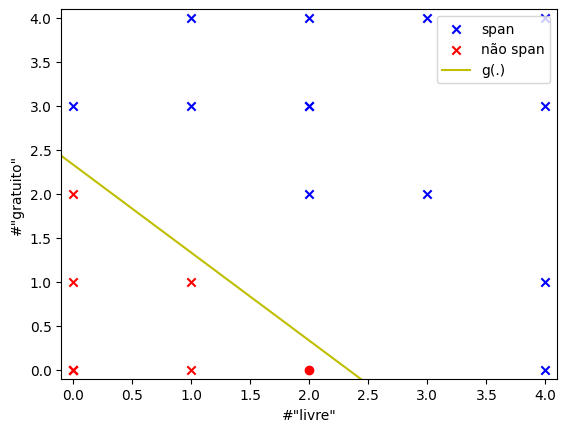

In [3]:
draw(X,y)

#executa o PLA sobre os dados de entrada X e y
rX = [ [1, x[0], x[1]] for x in X]
pla = PLA()
pla.execute(rX, y)


#desenha a reta inferida pelo PLA
xOri = [-1, 4]
yOri = [pla.getOriginalY(xOri[0]), pla.getOriginalY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='g(.)')
plt.legend(loc='upper right')

#Classifica o email: #"livre"=2, #"gratuito"=0
isSpam = pla.h([1, 2, 0]) # o 1 ali é o bias necessário pra reta se mexer no plano

if(isSpam == +1):
  plt.scatter(2, 0, color='blue', marker='o', label='span')
else:
  plt.scatter(2, 0, color='red', marker='o', label='not span')

**Atividade 4:**

Reproduza o mesmo experimento utilizando a classe *LRClassifier*.


3


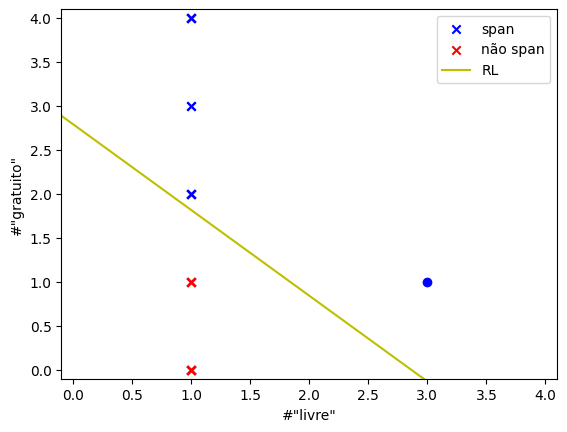

In [4]:
from lrclassifier import LRClassifier

draw(rX,y)

#executa o LRClassifier sobre os dados de entrada X e y
lr = LRClassifier()
lr.execute(X, y)
print(len(lr.w))

#desenha a reta inferida pelo PLA
xOri = [-1, 4]
yOri = [lr.getRegressionY(xOri[0]), lr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')

#desenha a reta inferida pela regressao linear
plt.legend(loc='upper right')

#Classifica o email: #"livre"=2, #"gratuito"=1
isSpam = lr.predict([[1,2,1]])[0]

if(isSpam == +1):
  plt.scatter(3, 1, color='blue', marker='o', label='span')
else:
  plt.scatter(3, 1, color='red', marker='o', label='not span')